In [59]:
import networkx as nx
import urllib.request
import operator
import matplotlib.pyplot as plt


In [2]:
# Gets data from web
def read_lj_friends(g, name):
    response = urllib.request.urlopen('https://www.livejournal.com/misc/fdata.bml?user=valerois')

    for line in response.readlines():
        # Ignore comment lines
        if line.startswith(b'#'):continue

        parts = line.split()
        # Ignore empty lines
        if len(parts) == 0: continue

        if parts[0][0] == '<':
            g.add_edge(parts[1], name)
        else:
            g.add_edge(name, parts[1])



In [3]:
# Similar to BFS
def snowball_sampling(g, center, max_depth=3, current_depth=0, visited=[]):
    # Base case
    if(current_depth == max_depth or center in visited): return visited
    else: visited.append(center)
        
    read_lj_friends(g, center)
    
    for node in g.neighbors(center):
        visited= snowball_sampling(g, node, current_depth= current_depth + 1, max_depth=max_depth, visited = visited)
        
    return visited

In [54]:
# Sorts degree dict
def sorted_map(map):
    ms = (sorted(map.items(), key=operator.itemgetter(1)))
    return ms


[('zina_korzina', 2596),
 ('samoleg', 2597),
 ('elladkin', 2616),
 ('masha_koroleva', 2683),
 ('snorapp', 2707),
 ('karial', 2717),
 ('cheger', 2887),
 ('tareeva', 2970),
 ('doctor_liza', 3046),
 ('borisakunin', 4691)]

In [65]:
def trim_degrees(g, d=1):
    g2 = g.copy()
    deg = nx.degree(g2)
    
    for n in g.nodes():
        if deg[n] <= d: g2.remove_node(n)
    return g2
            
    

In [4]:
g = nx.read_pajek('russians.net')
deg = dict(nx.degree(g))
deg_sorted=sorted_map(deg)
deg_sorted[-10:]

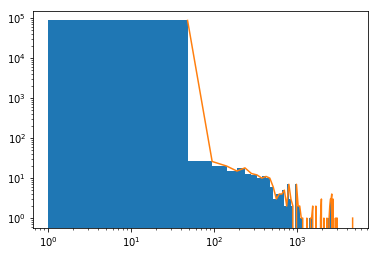

In [60]:
h = plt.hist(deg.values(), 100)
plt.loglog(h[1][1:], h[0])

/Users/stschoberg/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


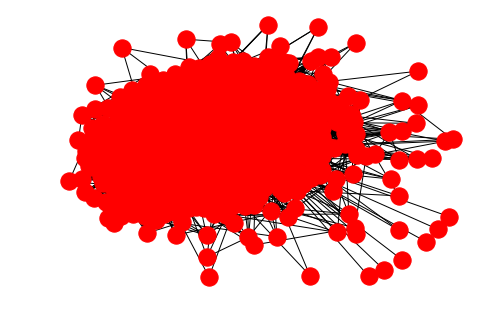

In [67]:
# A lot of noise in the graph from nodes with few connections

core = trim_degrees(g)
core3 = trim_degrees(g, 3)
core10 = trim_degrees(g, 10)

nx.draw(core10)